# Multiclass Clasification Problem - Hand Written Dataset (MNIST)

In [146]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Import mnist dataset directly from keras

In [148]:
(X_train, y_train),(X_test, y_test) = keras.datasets.mnist.load_data()

In [149]:
X_train.shape # This is 3D array

(60000, 28, 28)

In [150]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

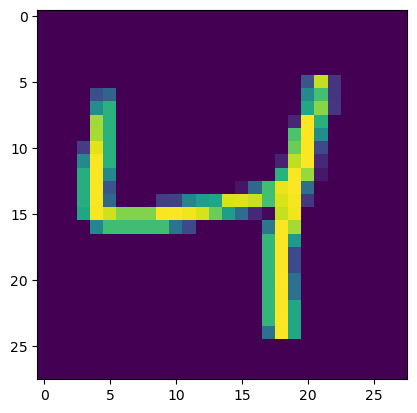

In [151]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

# Range 0 to 1 

In [153]:
X_train = X_train/255
X_test =  X_test/255

In [154]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [155]:
model = Sequential()

# Flatten the layer by converting 2d array to 1d
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation="relu")) # input not to mention because flatten output will be use as input
# model.add(Dense(32, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [156]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               100480    
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [157]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [158]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 6s 3ms/step - loss: 0.2880 - accuracy: 0.9182 - val_loss: 0.1641 - val_accuracy: 0.9543
Epoch 2/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1319 - accuracy: 0.9613 - val_loss: 0.1233 - val_accuracy: 0.9632
Epoch 3/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0904 - accuracy: 0.9732 - val_loss: 0.1101 - val_accuracy: 0.9666
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0683 - accuracy: 0.9800 - val_loss: 0.0984 - val_accuracy: 0.9715
Epoch 5/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0509 - accuracy: 0.9849 - val_loss: 0.0953 - val_accuracy: 0.9716
Epoch 6/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0409 - accuracy: 0.9871 - val_loss: 0.0971 - val_accuracy: 0.9743
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0325 - accuracy: 0.9898 - val_loss: 0.0865 - val_accuracy:

In [159]:
y_prob = model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [160]:
y_pred = y_prob.argmax(axis=1)

In [161]:
from sklearn.metrics import accuracy_score

In [162]:
accuracy_score(y_test, y_pred)

0.9744

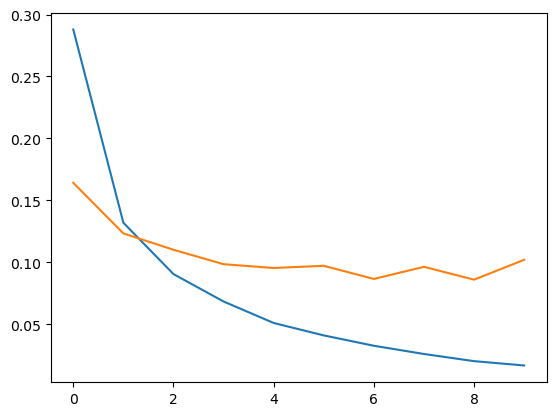

In [163]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

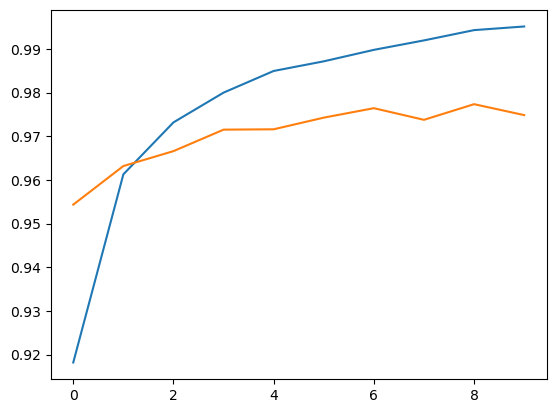

In [164]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

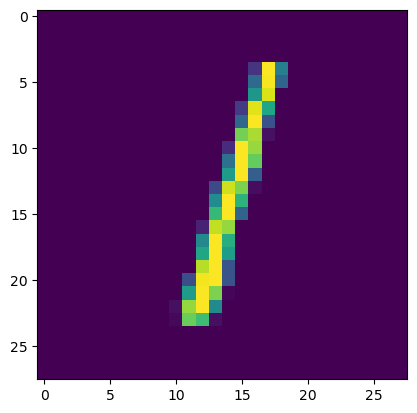

In [203]:
plt.imshow(X_test[2])

In [201]:
model.predict(X_test[2].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 20ms/step


array([1], dtype=int64)